.setosa, versicolor, virginica <br>
b. 품종별 측정데이터를 이용해 새로 채집한 iris의 품종을 예측하는 ML 모델을 제작 <br>
c. 품종별 측정데이터가 이미 존재하므로 지도학습(supervised learning)<br>
d. 3개의 품종 중 하나를 예측하는 문제이므로 분류(classification) 문제<br>
e. 입력 특성값을 feature(4개), 결과값을 class(3개의 class) 라 함<br>
f. 한 개의 꽃에 대한 측정값(sample)을 한 개의 품종으로 출력, 이 때 출력값(품종)을 Label 이라 함<br>

In [2]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [4]:
print('iris_datasets key\n', iris_dataset.keys())

iris_datasets key
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
print(iris_dataset['DESCR'][:230])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    


In [6]:
print(iris_dataset['target_names'])

['setosa' 'versicolor' 'virginica']


In [7]:
print(iris_dataset['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [10]:
print(type(iris_dataset['data']))

<class 'numpy.ndarray'>


In [11]:
print(iris_dataset['data'].shape)

(150, 4)


In [12]:
print(iris_dataset['data'][:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [14]:
print(type(iris_dataset['target']))

<class 'numpy.ndarray'>


In [16]:
print(iris_dataset['target'].shape)

(150,)


In [20]:
print(iris_dataset['target'])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## 성과 측정
a. 머신러닝 모델을 구축해 새로운 데이터의 품종을 예측해야 함 <br>
b. 훈련데이터는 평가에 사용할 수 없음(모델이 훈련하는 동안 데이터를 기억함)<br>
c. 150개의 sample을 training set 과 test set으로 나누어야 함<br>
- scikit-learn의 train_test_split 함수를 사용하여 데이터를 나눔
- 데이터는 대문자 X, 레이블을 소문자 y로 표기
- train_test_split 함수의 test_size 값을 0.0 ~ 1.0 사이로 지정할 수 있음, 지정하지 않으면 train set = 0.75, test set = 0.25로 기본 지정됨
- random_state 값은 랜덤 seed(0 ~ 42)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                                    iris_dataset['target'])

In [24]:
print(X_train.shape)
print(y_train.shape)

(112, 4)
(112,)


In [25]:
print(X_test.shape)
print(X_test.shape)

(38, 4)
(38, 4)


In [26]:
import pandas as pd
import mglearn
import matplotlib.pyplot as plt

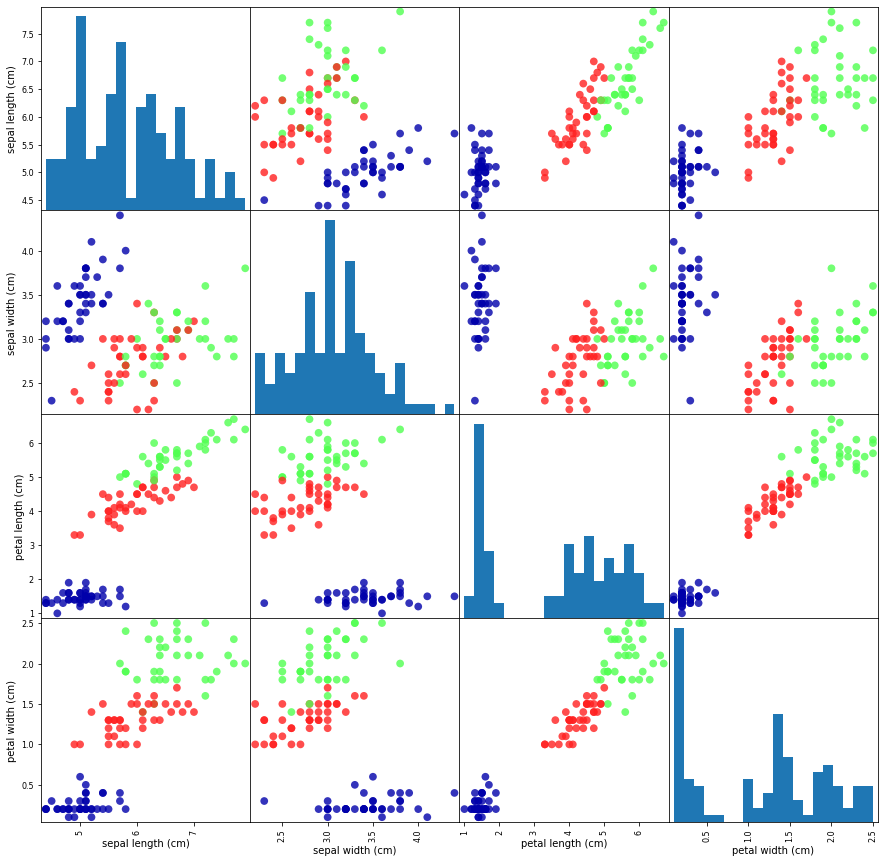

In [28]:
iris_dataFrame = pd.DataFrame(X_train, columns=iris_dataset['feature_names'])
pd.plotting.scatter_matrix(iris_dataFrame, c=y_train, figsize=(15,15),
                          marker='o', hist_kwds={'bins':20}, s=60, alpha=0.8,
                          cmap=mglearn.cm3)
plt.show()

### k-최근접 이웃 알고리즘(k-Nearest Neighbors, k-NN)
- 훈련 데이터를 저장하여 생성
- 새로운 데이터에 대한 예측은 가장 가까운 훈련 데이터의 포인트를 찾아서 결정
- 훈련데이터에서 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾음
- 위에서 찾은 이웃들의 클래스 중 빈도가 가장 높은 클래스를 예측값으로 사용, 이 예제에서는 하나의 이웃만 사용

In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

- 예측하기
- sepal length/wifth = 5/2.9, petal length/width = 1/0.2
- 위 데이터를 Numpy 2차원 배열로 생성

In [36]:
import numpy as np
X_new = np.array([[5, 2.9, 1, 0.3]])
print(X_new.shape)

(1, 4)


In [37]:
prediction = knn.predict(X_new)
print(prediction)

[0]


In [38]:
print("target 이름: ", iris_dataset['target_names'][prediction])

target 이름:  ['setosa']


In [42]:
y_pred = knn.predict(X_test)
print(y_pred)

[1 2 0 2 1 2 2 2 0 2 1 2 2 0 1 2 0 0 0 0 1 2 1 2 0 2 1 1 1 0 1 2 2 0 1 2 1
 1]


In [43]:
print("정확도: {:.2f}".format(np.mean(y_pred == y_test)))

정확도: 0.89


In [44]:
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'],
                                                    iris_dataset['target'])
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("정확도: {:.2f}".format(knn.score(X_test, y_test)))

정확도: 0.92
